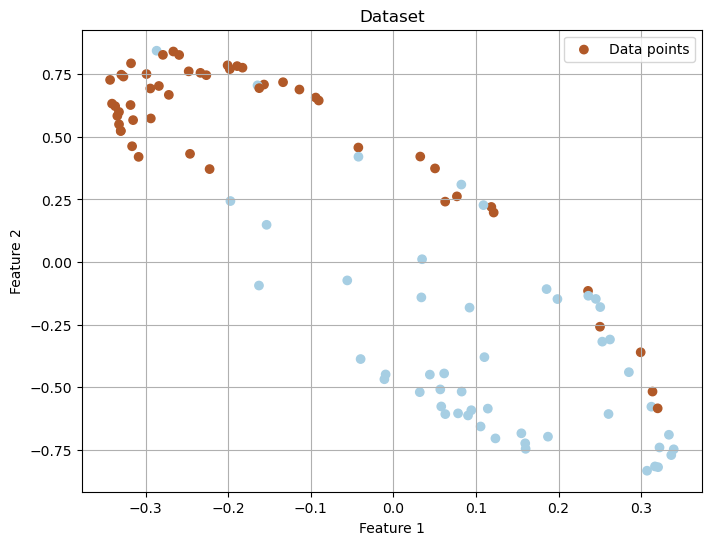

Optimal Weight Vector: [-4.14036799 13.04095369  1.62937474  1.10824333  7.11323469]
Accuracy Score: 0.8


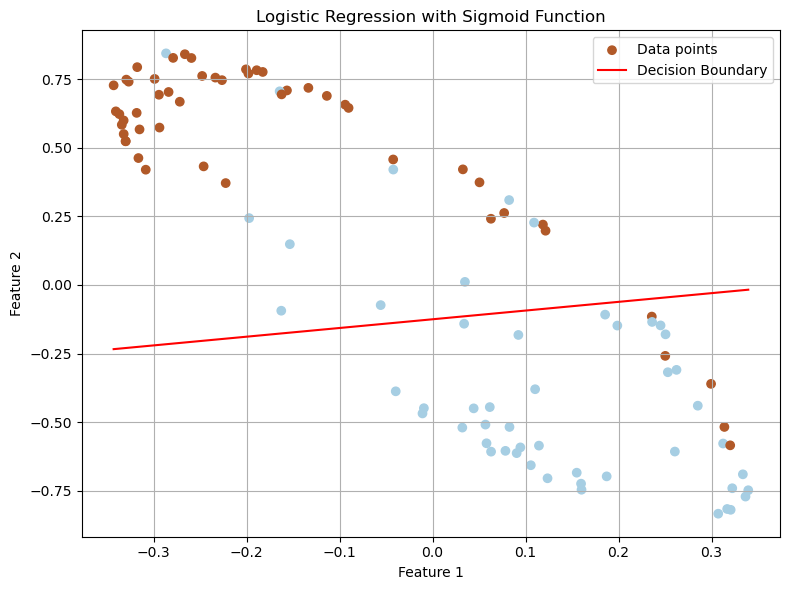

Confusion Matrix:
[[ 6  1]
 [ 3 10]]


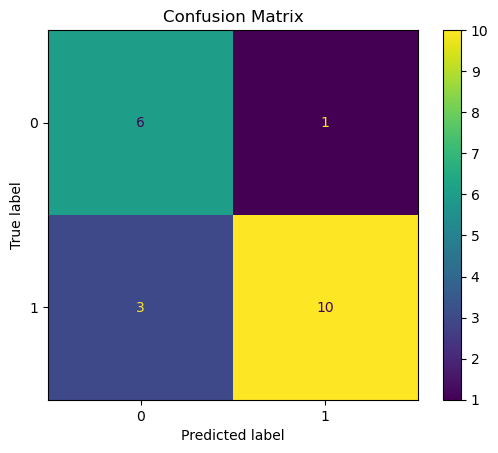

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Logistic regression training function
def logistic_regression(training_X, training_y, learning_rate=0.01, num_epochs=100):
    sz = training_X.shape[0]
    num_features = training_X.shape[1]
    w = np.zeros(num_features)  # Initialize weight vector
    for epoch in range(num_epochs):
        for i in range(sz):
            x = training_X[i]
            y = training_y[i]
            z = np.dot(w, x)
            h = sigmoid(z)
            gradient = (h - y) * x
            w = w - learning_rate * gradient
    return w

# Testing function
def predict(testing_X, trained_w):
    y_pred = []
    for i in range(len(testing_X)):
        x = testing_X[i]
        z = np.dot(trained_w, x)
        h = sigmoid(z)
        y_pred.append(1 if h >= 0.5 else -1)  # Predict 1 if probability >= 0.5, else -1
    return y_pred

# Generate a binary classification dataset with 2 classes and 5 features
X, y = make_classification(n_samples=100, n_features=5, n_classes=2)
# Make classes {-1,1} instead of {0,1}
y = 2 * y - 1

# Normalize the dataset of X with its own norm xi
for i in range(100):
    X[i] = X[i] / (np.linalg.norm(X[i, :]))  # Preprocessing the data

# Split test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data points")
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

# Call for training
weight_vector = logistic_regression(X_train, y_train)

# Call for testing the dataset
y_pred = predict(X_test, weight_vector)

# Display results
accuracy = accuracy_score(y_test, y_pred)
print("Optimal Weight Vector:", weight_vector)
print("Accuracy Score:", accuracy)

# Decision boundary
x1_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
x2_values = -(weight_vector[0] * x1_values + weight_vector[2]) / weight_vector[1]

# Plot dataset with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, label="Data points")
plt.plot(x1_values, x2_values, color='red', label="Decision Boundary")
plt.title("Logistic Regression with Sigmoid Function")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
